<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/CS166_PCW_Class_14_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS166 14.2 PCW

## Exercise 1

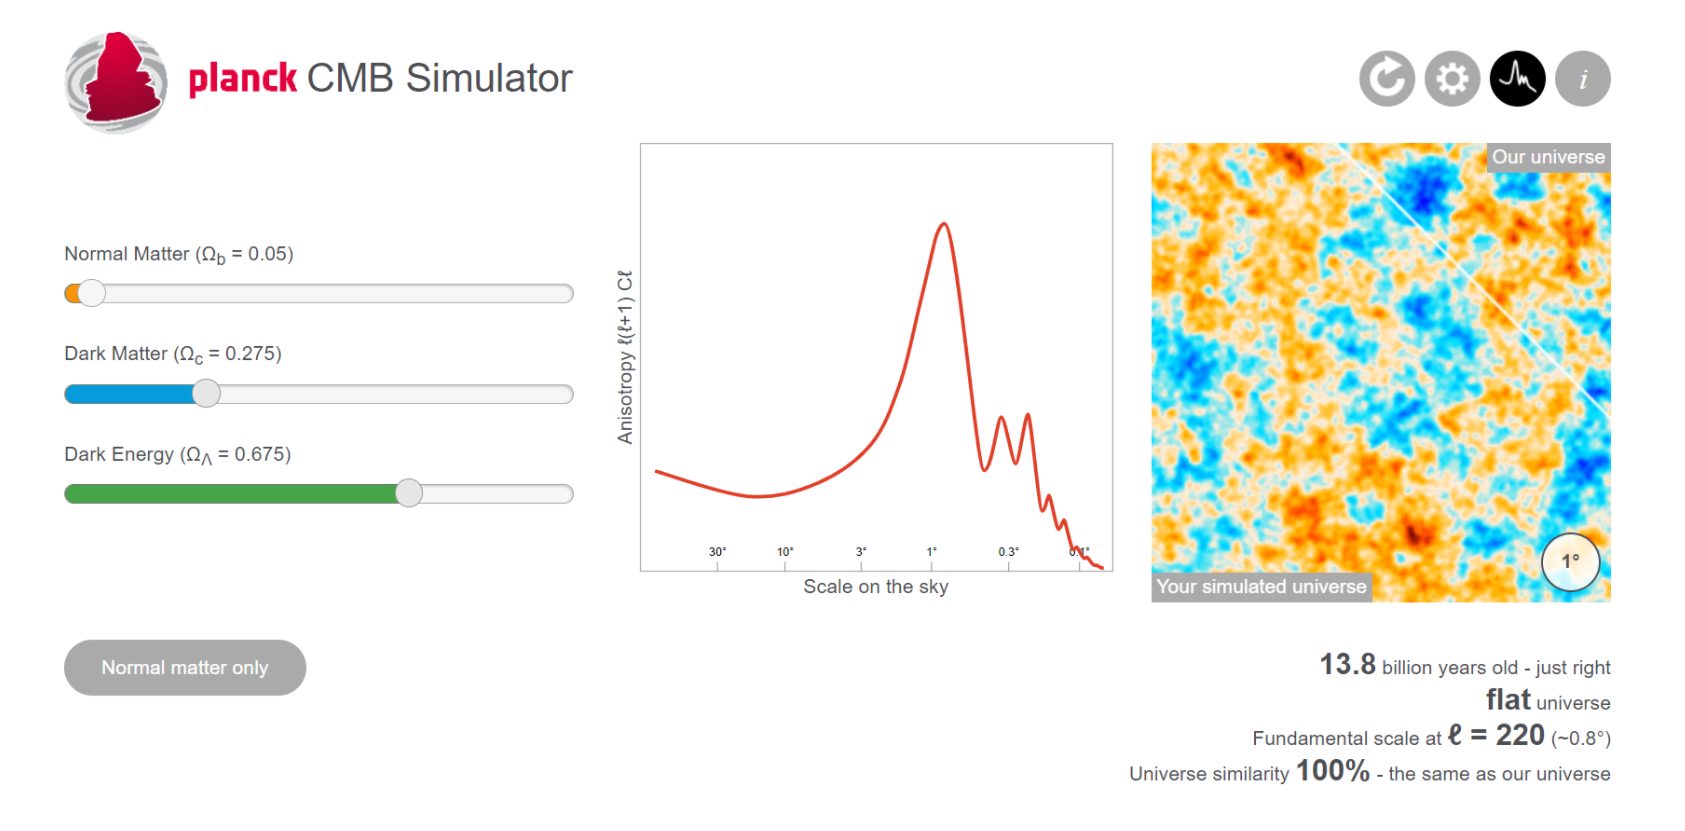

## Exercise 2

#### (1)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

data = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")
t_values = np.array(data['time'], dtype=float)
count_values = np.array(data['count_rate'], dtype=float)

### (2)

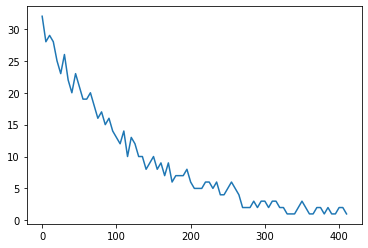

In [45]:
plt.plot(t_values, count_values)

### (3) and (4)

In [37]:
import scipy.optimize as opt
def nt_model(t, lam):
  return 32*np.exp(-lam*t)

lambdas = []
for i in range(10000):
  count_values_noise = count_values + sts.norm.rvs(loc = 0, scale = 1, size = len(t_values))
  curve = opt.curve_fit(nt_model, t_values, count_values_noise, [1])
  lambdas.append(curve[0][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


### (5)

(array([  2.,   1.,   3.,  11.,  18.,  45.,  85., 148., 220., 338., 490.,
        664., 799., 898., 992., 981., 930., 836., 710., 573., 413., 328.,
        208., 120.,  91.,  43.,  27.,  14.,  10.,   2.]),
 array([0.0080252 , 0.0080531 , 0.00808099, 0.00810889, 0.00813679,
        0.00816469, 0.00819258, 0.00822048, 0.00824838, 0.00827627,
        0.00830417, 0.00833207, 0.00835997, 0.00838786, 0.00841576,
        0.00844366, 0.00847156, 0.00849945, 0.00852735, 0.00855525,
        0.00858315, 0.00861104, 0.00863894, 0.00866684, 0.00869474,
        0.00872263, 0.00875053, 0.00877843, 0.00880633, 0.00883422,
        0.00886212]),
 <a list of 30 Patch objects>)

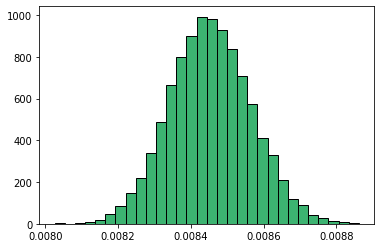

In [41]:
plt.hist(lambdas, bins=30, edgecolor = 'black', color = 'mediumseagreen')

### (6)

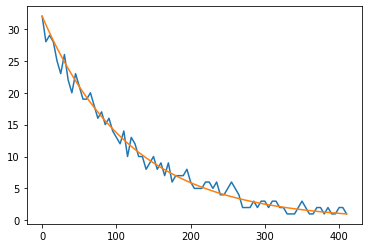

In [46]:
mean_lambda = np.mean(lambdas)
plt.plot(t_values, count_values)
plt.plot(t_values, nt_model(t_values, mean_lambda))

In [49]:
error  = nt_model(t_values, mean_lambda) - count_values
error = np.abs(error)
mean_error = np.mean(error)
mean_error

0.8450679763101288

### (7)

This method, using the curve fit function, is deterministic. If we didn't have the measurement error, we would obtain the same value for lamba every time (we wouldn't have a distribution). There is no simluation going on, we use an algorithm that minimizes the error between the inputs and the predicted ys. The MCMC is a monte carlo algorithm, which means we are simulating new proposals that are accepted or rejected at each step with a certain probability. This means that even without measurement error, we would have a distribution of lambdas (i.e. parameters). 